In [1]:
#MNIST datasety
#fashion mnist

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
#labels
label= 'T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker Bag Ankle-boot'
label= label.split()
label

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle-boot']

In [6]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.max()#white

255

In [ ]:
x_train.min()#black

0

In [ ]:
#noramalize the data of x_train
#simplest way to normalize is to divide by 255
x_train= x_train/255.0
x_test= x_test/255.0

In [ ]:
x_train[1751].max()

1.0

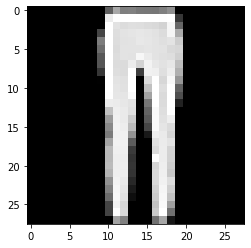

output : Trouser


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1751], cmap='gray')
plt.show()
print(f"output : {label[y_train[1751]]}")

In [ ]:
y_train[1751]

1

In [ ]:
x_train.shape #it's 3d but keras expects 4d

(60000, 28, 28)

In [ ]:
#define the NN architecture
from tensorflow import keras
model = keras.models.Sequential()#simple nn
# 1.input
# 2. hidden
# 3. output
#to ass neurons to all 3 layers
model.add(keras.layers.Flatten())  # 28*28 grayscale images = 784 neurons for input layer
model.add(keras.layers.Dense(512,input_shape=(28,28),activation='relu')) #hidden layer neurons #2/3*784-10=512
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mod1= model.fit(x_train, y_train, epochs=10)

In [ ]:
model.get_weights()

In [ ]:
y_pred = model.predict(x_test)
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8903

In [ ]:
#save the model
model.save('model_fashionmnist.hdf5')
#hdf5 hierarchial data format version5 
#used to store the nn model in a file

Shirt


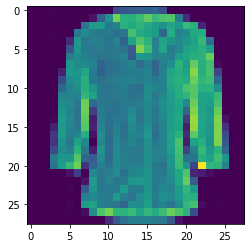

In [ ]:
#for one value
y_pred = model.predict(x_test[4].reshape(1,28,28))
y_pred = np.argmax(y_pred)
y_pred
plt.imshow(x_test[4])
print(label[y_pred])